<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/PG/%EB%8F%84%EB%84%9B%EA%B3%BC_%EB%A7%89%EB%8C%80_%EA%B7%B8%EB%9E%98%ED%94%84(_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 도넛과 막대 그래프

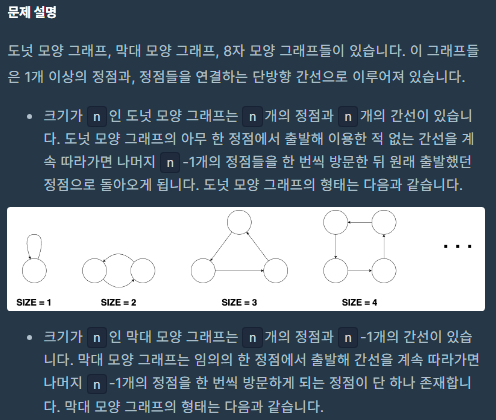

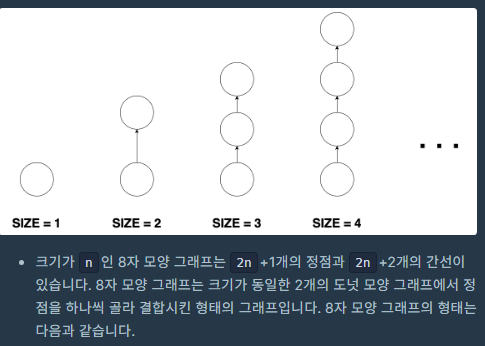

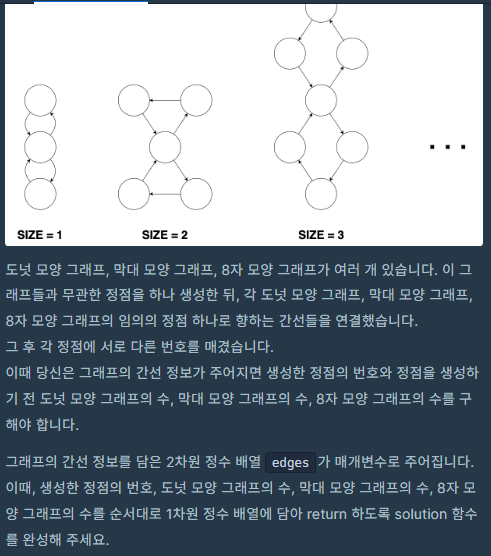

## 입력 출력 및 예제


* 입력

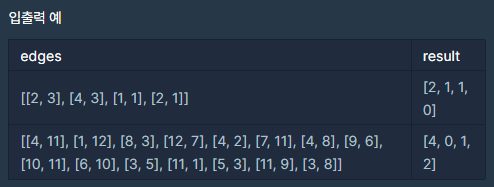

* 출력

* 예제

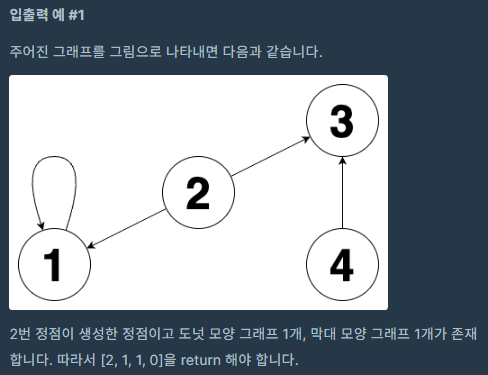

## 구상

- 진법으로 접근

## 코드

In [16]:
# 실패
from collections import defaultdict

def solution(edges):
    MAX = 1000001
    indegree = [0] * MAX
    outdegree = [0] * MAX
    graph = defaultdict(list)

    # 그래프 구성 및 진입/진출 차수 계산
    for a, b in edges:
        graph[a].append(b)
        outdegree[a] += 1
        indegree[b] += 1

    # 시작 노드: 진입차수 0, 진출차수 >= 2
    start = -1
    for node in range(1, MAX):
        if indegree[node] == 0 and outdegree[node] >= 2:
            start = node
            break

    # 시작 노드에서 나가는 간선 제거 (실제 그래프에서는 서브그래프만 추적)
    for b in graph[start]:
        indegree[b] -= 1
    outdegree[start] = 0
    graph[start] = []

    visited = [False] * MAX
    donuts = bars = eights = 0

    def dfs(node):
        stack = [node]
        visited[node] = True
        cycle_count = 0
        parents = {}  # 순환 확인용

        while stack:
            curr = stack.pop()
            for next_node in graph[curr]:
                if not visited[next_node]:
                    visited[next_node] = True
                    parents[next_node] = curr
                    stack.append(next_node)
                elif next_node in parents and parents[curr] != next_node:
                    # 이미 방문했고 부모가 아닌 노드로 돌아가면 사이클
                    cycle_count += 1

        return cycle_count

    # 시작 노드에서 이어지는 노드들 각각 탐색
    for b in edges:
        a, to = b
        if a == start and not visited[to]:
            cycles = dfs(to)
            if cycles == 0:
                bars += 1
            elif cycles == 1:
                donuts += 1
            else:
                eights += 1

    return [start, donuts, bars, eights]


In [ ]:
# 다른 사람 풀이
def solution(edges):
    n = 0
    # [정점, 도넛, 막대, 8자]
    answer = [0, 0, -1, 0]
    total = 0

    for _, [a, b] in enumerate(edges):
        max_node = max(a, b)
        n = max(max_node, n)

    # meta [노드에 들어오는 간선의 개수, 노드로부터 나가는 간선의 개수]
    meta = [[0, 0] for _ in range(n + 1)]
    graph = [[] for _ in range(n + 1)]

    for _, [a, b] in enumerate(edges):
        graph[a].append(b)
        meta[b][0] += 1
        meta[a][1] += 1

    # 그래프의 노드를 순회하면서 해당 노드의 이웃의 수가 2개 이상일 경우 탐색
    for i, [come, out] in enumerate(meta):
        # 시작 노드 / 나가는 정점 두개 이상, 들어오는 정점 없음
        if come == 0 and out >= 2:
            answer[0] = i
            total = len(graph[i])

        # 막대 그래프
        if come >= 0 and out == 0:
            answer[2] += 1

        # 8자 그래프
        if come >= 2 and out == 2:
            answer[3] += 1

    answer[1] = total - answer[2] - answer[3]
    return answer

In [17]:
edge = [[2, 3], [4, 3], [1, 1], [2, 1]]

In [19]:
edge = [[4, 11], [1, 12], [8, 3], [12, 7], [4, 2], [7, 11], [4, 8], [9, 6], [10, 11], [6, 10], [3, 5], [11, 1], [5, 3], [11, 9], [3, 8]]

In [20]:
solution(edge)

[4, 0, 3, 0]

In [ ]:
def get_nth_string(n, alphabet):
    k = len(alphabet)
    length = 1
    total = 0

    # Step 1: 길이를 하나씩 늘려가며 전체 문자열 개수 누적합을 구함
    while True:
        cnt = k ** length
        if total + cnt >= n:
            break
        total += cnt
        length += 1

    # Step 2: n번째 문자열은 길이가 length이고, 전체에서 (n - total - 1)번째 (0-based)
    index = n - total - 1

    # Step 3: 해당 index를 k진수로 변환하여 문자열 구성
    result = ""
    for _ in range(length):
        result = alphabet[index % k] + result
        index //= k

    return result


def solution(n, bans):
    bans.sort(key = lambda x: (len(x),x))

    alphabet = [chr(i) for i in range(ord('a'), ord('z') + 1)]
    target = get_nth_string(n, alphabet)

    for b in bans:
        if len(b) < len(target):
            n += 1
            target = get_nth_string(n, alphabet)

        elif len(b) == len(target):
            if b <= target:
                n += 1
                target = get_nth_string(n, alphabet)




    answer = target
    return answer

In [ ]:
def sort_bans(bans):


In [ ]:
n = 30
bans = ["d", "e", "bb", "aa", "ae"]

In [ ]:
n = 7388
bans = ["gqk", "kdn", "jxj", "jxi", "fug", "jxg", "ewq", "len", "bhc"]

In [ ]:
solution(n,bans)

target : ad
n :31, 정답 : ae
n :32, 정답 : af
n :33, 정답 : ag
n :34, 정답 : ah


'ah'

In [ ]:
bans.sort()
bans

['bhc', 'ewq', 'fug', 'gqk', 'jxg', 'jxi', 'jxj', 'kdn', 'len']

### 메모

*

- 이분 탐색!